<a href="https://colab.research.google.com/github/Priyankamishra2098/regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

## **1.Importing Libraries and Dataset**

### Importing Libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNetCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

print("Libraries imported sucessfully")


Libraries imported sucessfully


### Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_yes = "/content/drive/MyDrive/data_YesBank_StockPrices.csv"
print("Dataset loaded sucessfully")

Dataset loaded sucessfully


### Reading of Dataset

In [5]:
df = pd.read_csv(data_yes)
print("Dataset Read Sucessfully")

Dataset Read Sucessfully


###Dimensions of Dataset

In [6]:
print(df.shape)

(185, 5)


### Dataset First View

In [7]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## **2.Understanding the Variables**

###Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Unique Values for each variable

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

In [12]:
yes_df = df.copy()

In [13]:
yes_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [14]:
yes_df['Date'] = pd.to_datetime(yes_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [15]:
yes_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

#### Chart - 1 : Distribution plot  for the 'Close' prices

<Axes: xlabel='Close', ylabel='Density'>

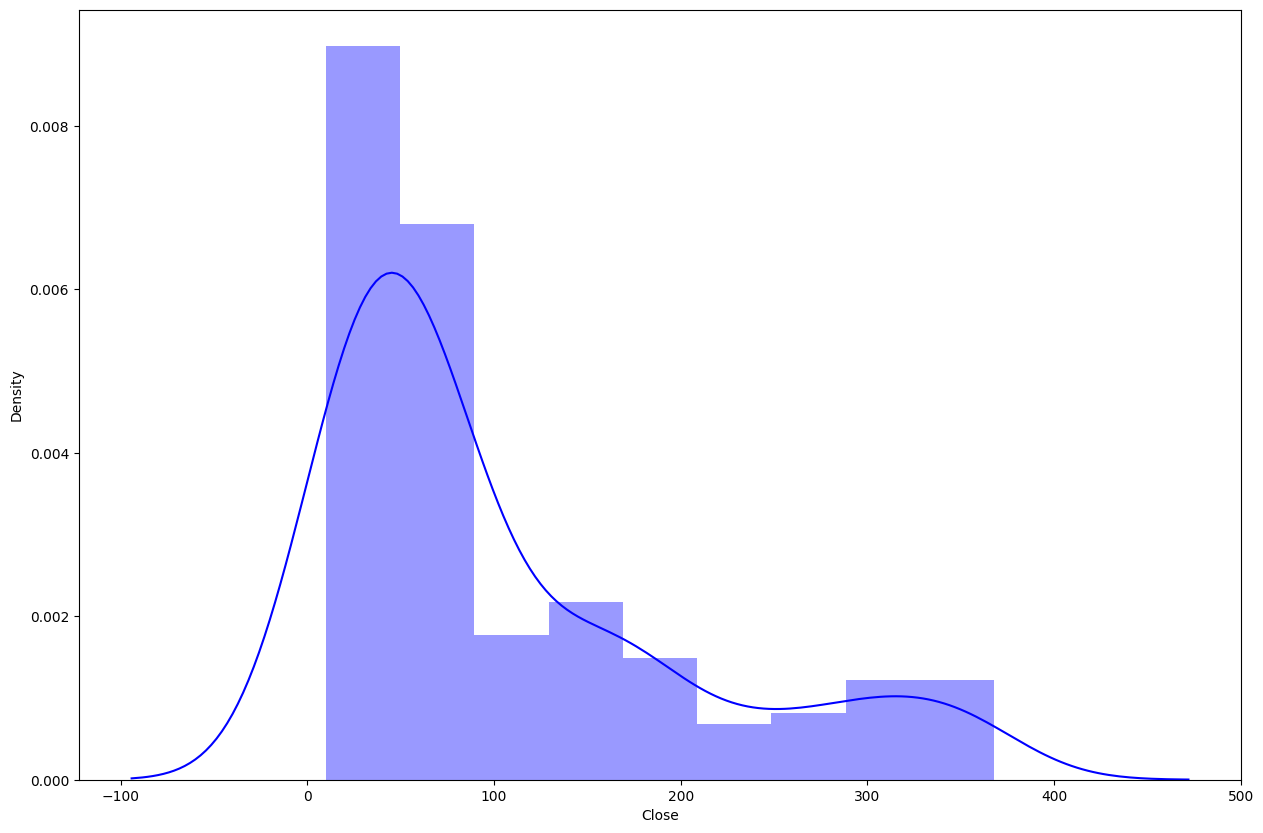

In [16]:
# Chart - 1 visualization code
# Dependent Variable 'Price'
plt.figure(figsize = (15,10))
sns.distplot(yes_df['Close'], color = "blue")

##### 1. Why did you pick the specific chart?

Choosing a distribution plot (histogram) for visualizing the distribution of the 'Close' prices has several advantages:

1. Understanding the Data Distribution
2. Identifying Patterns
3. Outlier Detection
4. Bin Selection
5. Data Exploration
6. Visualization of Trends Over Time
7. Ease of Interpretation

It provides a quick and intuitive overview of the data's central tendency, spread, and potential outliers. It's especially useful for initial data exploration and identifying patterns in the data.







##### 2. What is/are the insight(s) found from the chart?

As per the Chart 1 'Close' column data is positively skewed. In other words, the majority of the data points cluster towards the left, and there are relatively fewer data points with higher values.

So to deal with it I need to apply a logarithmic transformation to the data can help reduce right skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these visualizations can certainly contribute to positive business impact.  Identifying skewed distributions might prompt further investigation into the causes, and addressing these issues could lead to more accurate predictions or improved decision-making.

#### Chart - 2 : Visualizing numeric features with histograms

In [17]:
numeric_features = yes_df.select_dtypes(include=['number']).columns.tolist()
print(numeric_features)


['Open', 'High', 'Low', 'Close']


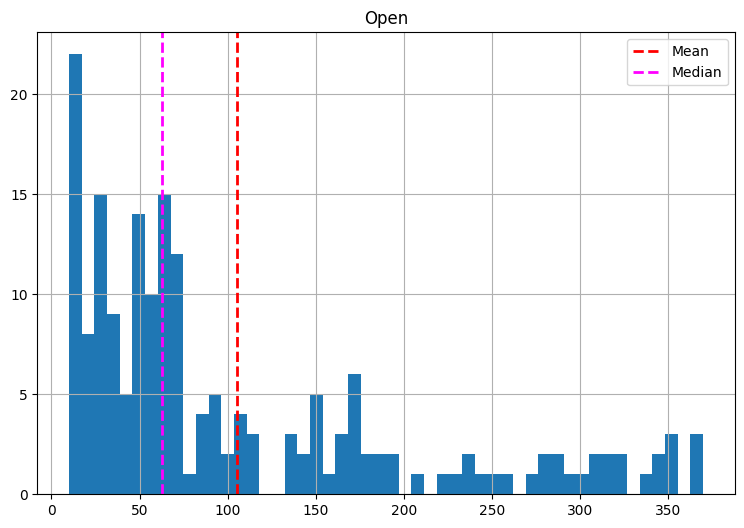

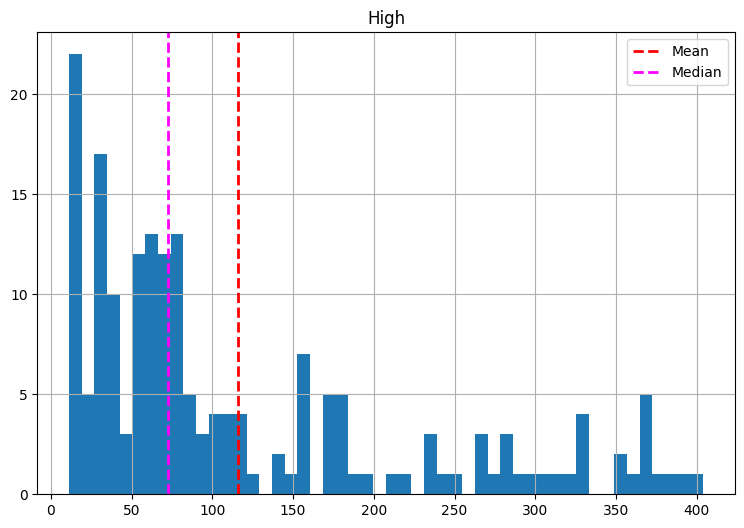

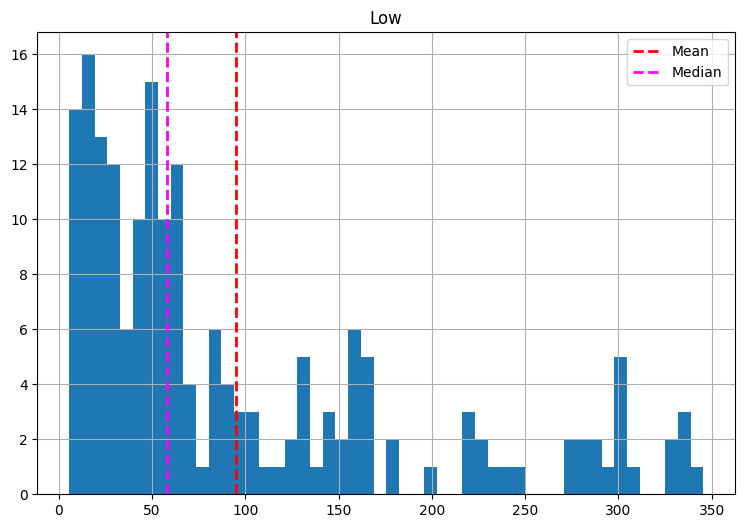

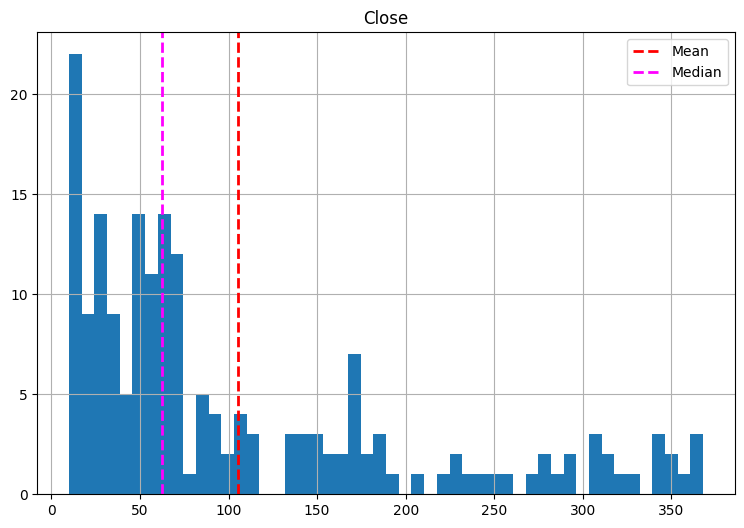

In [18]:
# Chart - 2 visualization
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = yes_df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
  ax.legend(['Mean', 'Median'])

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are great for showing the distribution of a numeric variable. The mean and median lines provide a quick snapshot of central tendency. Using these visualizations can help  quickly identify the shape of the distribution and understand where the majority of the data points lie. It's a good choice for getting a sense of the data's overall pattern and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are positively skewed. So to deal with it I need to apply a logarithmic transformation to the data can help reduce right skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these visualizations can certainly contribute to positive business impact. Understanding the distribution of numeric features, central tendencies, and spotting outliers can help in making informed business decisions.  Identifying skewed distributions will help me in further investigation into the causes, and addressing these issues that could lead to more accurate predictions or improved decision-making.

#### Chart - 3 : Visualizing 'Date' with histograms

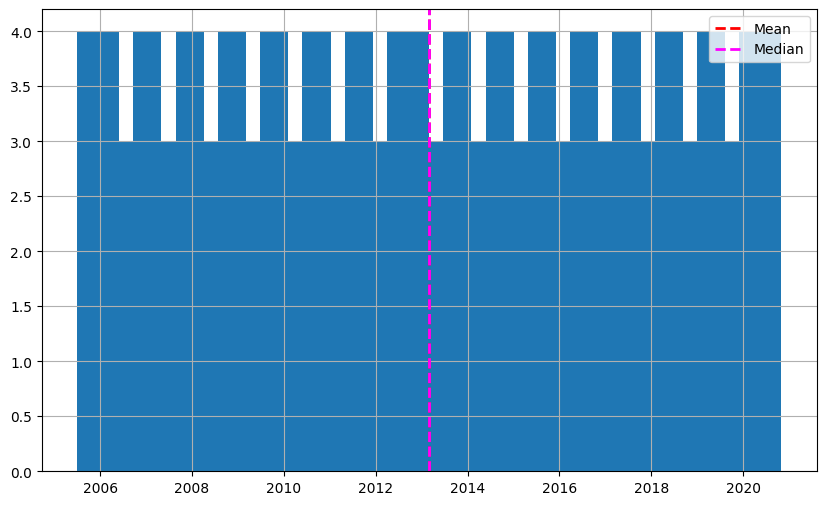

In [33]:
# Chart - 3 visualization
fig = plt.figure(figsize =(10, 6))
ax = fig.gca()
feature = yes_df['Date']
feature.hist(bins = 50, ax = ax)
ax.axvline(feature.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax.legend(['Mean', 'Median'])

##### 1. Why did you pick the specific chart?

Visualizing the distribution of dates is a good approach for understanding the temporal patterns in your data. Histograms can reveal trends, seasonality, or irregularities in the distribution of dates, while the mean and median lines provide insights into the central tendency of the date values. This type of chart is particularly useful when dealing with time-series data, allowing to spot any patterns or anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

The mean and median lines are overlapping, it indicates that the distribution of  date values is symmetric. In the context of dates, this suggests that there's no significant skewness or bias towards a particular period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

n the context of predicting stock prices, a symmetric distribution of dates may indicate a consistent and balanced historical pattern.

Positive Impact:

Stability in Trends: A symmetric distribution suggests that the historical closing prices don't exhibit extreme variations or biases towards specific periods. This stability can be advantageous for modeling and predicting future trends.

Potential Negative Impact:

Hidden Volatility: If there are sudden changes or volatility in stock prices that aren't reflected in the symmetric distribution, it might be challenging to capture and predict such events. Anomalies or unexpected market movements may not be evident from the visual alone.


In stock price prediction, the effectiveness of model depends on various factors, including the features used, data quality, and the chosen algorithm. The symmetric distribution of dates provides a foundational understanding, but additional analysis and feature engineering may be necessary to capture the intricacies of stock market behavior.

#### Chart - 4 : Visualizing the monthly closing prices

In [34]:
# Chart - 4 visualization code
ax = px.line(yes_df, yes_df['Date'], yes_df['Close'], title = 'Monthly Closing Price' )
ax.update_layout(xaxis = dict(title = 'year'), yaxis = dict(title = 'Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

Line charts make it easy to identify patterns, trends, and fluctuations in the data, providing a clear representation of how the closing prices have evolved over time. A line chart is an excellent choice for visualizing time-series data, especially when tracking the trend of a variable over time.

##### 2. What is/are the insight(s) found from the chart?

1. IPO (2005): The initial low closing prices after the IPO in 2005 is likely be visible as the starting point on the line chart.


2. Crossing 100 in May 2014: A significant upward trend, possibly reaching a peak, can be observed around May 2014.


3. Highest in July 2018: The peak around July 2018, reaching 367.9, aligns with the highest closing price.


4. Drop in Late 2018: The subsequent significant drop in late 2018 could correspond to the impact of the alleged investments in DHFL and the associated scandal.


5. 2020 COVID Impact: The line chart might show a dip or fluctuation around 2020, reflecting the broader market impact of the COVID-19 pandemic.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

1. Informed Decision-Making: Understanding the historical events and their correlation with stock price movements allows for more informed decision-making. This knowledge can guide future investment strategies and risk management.

2. Early Warning Signs: Recognizing patterns or trends in the data related to specific events can serve as early warning signs. This enables proactive measures to be taken in response to potential challenges or opportunities.

3. Risk Mitigation: The insights gained can contribute to the development of more robust risk mitigation strategies. Businesses can adjust their approach based on historical precedents, minimizing the impact of negative events.

Negative Impact:

1. Market Sentiment: Negative events, especially those involving scandals or financial misconduct, can significantly impact market sentiment. This could lead to a prolonged period of decreased investor confidence and potential negative growth.

2. Reputation Damage: The association with the DHFL scam and other negative events can harm Yes Bank's reputation, leading to decreased trust among investors, customers, and other stakeholders.

3. Investor Flight: Significant drops in stock prices may lead to investor flight, causing a loss of capital and potentially hindering the bank's ability to raise funds.

In summary, while the insights themselves are valuable for strategic planning and risk management, the actual impact on business growth will depend on how effectively the organization responds to and mitigates the challenges posed by these historical events. Taking proactive measures and learning from past experiences can contribute to a more resilient and adaptive business strategy.






#### Chart - 5

In [20]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [21]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [22]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [23]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [24]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [25]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [26]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [27]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [28]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [29]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [30]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here